# Double Pulse Test Comparative Analysis

Author: Joshua Sello

Institutions: Reutlingen Hochschule, and Stellenbosch University

In [1]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os 
from pathlib import Path
from switchsim import *


simulation_output_directory_path = Path("dpt_simulation_outputs")
simulation_results_directory_path = Path("dpt_simulation_results")

os.getcwd()


'C:\\Users\\joshu\\Development\\university-development\\switchsim\\example\\notebooks'

## 1. Load Simulation Config


In [2]:
config = load_config_from_yaml(
    config_file_path="../dpt_gan_simulation.yaml",
    simulation_type=SimulationType.DOUBLE_PULSE_TEST,
)
config

ConfigData(setup=ConfigSetupData(output_field_mapping=DoublePulseTestOutputFields(time='time', dut_gate_voltage='V(dut_gate_voltage)', dut_drain_voltage='V(dut_drain_voltage)', dut_source_voltage='V(dut_source_voltage)', dut_drain_current=['Ix(dut:DRAININ)', 'Ix(dut:D)']), default_parameters=DoublePulseTestParameters(leading_duration=5e-06, lagging_duration=5e-06, load_supply_voltage=400.0, load_test_current=4.0, first_pulse_duration=5e-05, second_pulse_duration=5e-06, off_duration=5e-06, on_gate_resistance=10.0, dut_case_temperature=25.0, max_timestep=5e-05), ltspice_executable_file_path=WindowsPath('C:/Users/joshu/Development/university-development/switchsim/res/LTspice.exe')), runs={'double_pulse_test_gan_gs66516t': RunData(source_file_path=WindowsPath('C:/Users/joshu/Development/university-development/switchsim/example/double_pulse_test_gan_gs66516t.asc'), parameters_to_sweep={'load_test_current': SweptParameterData(start=5.0, end=25.0, step=5.0)}), 'double_pulse_test_gan_v22tc65s1

## 2. Execute or Load Simulation Outputs

In [3]:
if not simulation_output_directory_path.exists():
    per_run_outputs = run_double_pulse_test_simulations(
        runs=config.runs,
        default_parameters=config.setup.default_parameters,
        output_field_mapping=config.setup.output_field_mapping,
        ltspice_executable_file_path=config.setup.ltspice_executable_file_path,
        verbose=True,
    )
    
    save_simulation_outputs(
        output_directory_path=simulation_output_directory_path,
        per_run_outputs=per_run_outputs,
    )
else:
    per_run_outputs = load_double_pulse_test_simulation_outputs(
        output_directory_path=simulation_output_directory_path,
    )

Run 1 / 2 - double_pulse_test_gan_gs66516t: C:\Users\joshu\Development\university-development\switchsim\example\double_pulse_test_gan_gs66516t.asc
		 - 1 / 4 Executing 2025-02-12_17-46-02_98e62274-5979-437c-904a-4369d71e3e5b.asc...
		 - 1 / 4 Executed in  4.86 seconds
		 - 2 / 4 Executing 2025-02-12_17-46-07_7d684295-7758-4ba8-9a09-35220d25b8ee.asc...
		 - 2 / 4 Executed in  1.41 seconds
		 - 3 / 4 Executing 2025-02-12_17-46-09_28b61bbf-0f32-4220-a15a-f1b1956cad66.asc...
		 - 3 / 4 Executed in  13.20 seconds
		 - 4 / 4 Executing 2025-02-12_17-46-23_9add9391-0d10-4380-b7fc-4245fa8c46e8.asc...
		 - 4 / 4 Executed in  5.91 seconds
	 - load_test_current: 2 rows
Run 2 / 2 - double_pulse_test_gan_v22tc65s1a1: C:\Users\joshu\Development\university-development\switchsim\example\double_pulse_test_gan_v22tc65s1a1.asc
		 - 1 / 4 Executing 2025-02-12_17-46-29_be1f509e-ab0a-4687-8e76-326cdefa7ba5.asc...
		 - 1 / 4 Executed in  6.66 seconds
		 - 2 / 4 Executing 2025-02-12_17-46-36_0d0d9b4b-6125-47a9

In [4]:
per_run_outputs

{'double_pulse_test_gan_gs66516t': {'load_test_current': [(DoublePulseTestParameters(leading_duration=5e-06, lagging_duration=5e-06, load_supply_voltage=400.0, load_test_current=np.float64(5.0), first_pulse_duration=5e-05, second_pulse_duration=5e-06, off_duration=5e-06, on_gate_resistance=10.0, dut_case_temperature=25.0, max_timestep=5e-05),
                   time  dut_gate_voltage  dut_drain_voltage  dut_source_voltage  \
    0      0.000000e+00          0.000003         400.000000                 0.0   
    1      5.000000e-10          0.000003         400.000000                 0.0   
    2      1.000000e-09          0.000003         400.000000                 0.0   
    3      2.000000e-09          0.000003         400.000000                 0.0   
    4      4.000000e-09          0.000003         400.000000                 0.0   
    ...             ...               ...                ...                 ...   
    62780  6.579900e-05          0.000003         400.880127       

## 3. Process Simulation Outputs
The values selected in the config file are extracted from the simulation output data as follows:

In [5]:
per_run_results = process_double_pulse_simulation_outputs(
    per_run_outputs=per_run_outputs,
    selected_results=config.results,
)

Alternatively, other results can be selected by providing a list of result keys as an aguement, i.e. `selected_results=["turn_off_loss"]`

---

The results for a given parameter sweep can be accessed as follows:

In [6]:
per_run_results["double_pulse_test_gan_gs66516t"]["load_test_current"]

,leading_duration,lagging_duration,load_supply_voltage,load_test_current,first_pulse_duration,second_pulse_duration,off_duration,on_gate_resistance,dut_case_temperature,max_timestep,turn_off_loss,turn_on_loss
0,0.000005,0.000005,400.0,5.0,0.00005,0.000005,0.000005,10.0,25.0,0.00005,0.000104,0.000097
1,0.000005,0.000005,400.0,10.0,0.00005,0.000005,0.000005,10.0,25.0,0.00005,0.000352,0.000682
2,0.000005,0.000005,400.0,15.0,0.00005,0.000005,0.000005,10.0,25.0,0.00005,0.000123,0.000048
3,0.000005,0.000005,400.0,20.0,0.00005,0.000005,0.000005,10.0,25.0,0.00005,0.002382,0.000068


---

Plots combine the results for each run given a selected parameter can be generated as follows:

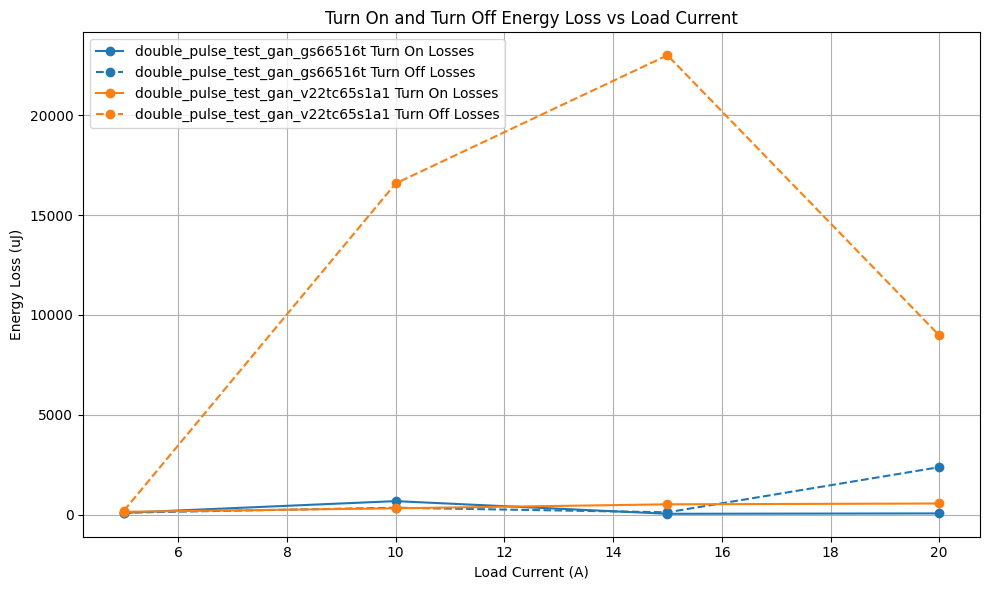

In [7]:

plot_parameter_results(
    results=per_run_results,
    parameter="load_test_current",
    title="Turn On and Turn Off Energy Loss vs Load Current",
    xlabel="Load Current (A)",
    ylabel="Energy Loss (uJ)",
    per_result_plot_data={
        "turn_on_loss": ResultPlotData(
            label="Turn On Losses",
            marker="o",
        ),
        "turn_off_loss": ResultPlotData(
            label="Turn Off Losses",
            marker="o",
            linestyle="--",
        ),
    },
    y_multiplier = 1e6,
)
